In [1]:
import glob
import os 
import cv2
import numpy as np
import matplotlib.pyplot as plt
import json
import torch 

In [2]:
import zipfile
with zipfile.ZipFile("/content/PracData.zip", 'r') as zip_ref:
    zip_ref.extractall()

# Websites to check out: 

* Work with tensorboard

How to build the UNet
* https://amaarora.github.io/2020/09/13/unet.html
* https://github.com/milesial/Pytorch-UNet

StackOverFlow
* https://stackoverflow.com/questions/47845059/how-to-make-segmentation-mask-given-region-marked-with-dotted-line-in-python




In [52]:
class GrapeDataset():

  def __init__(self, image_root_path, annot_root_path, classes):

    self.image_file_paths = glob.glob(os.path.join(image_root_path, "*.png"))
    self.annot_file_paths = glob.glob(os.path.join(annot_root_path, "*.json"))
    self.classes = classes
 
  def __getitem__(self, idx): 

    img_path = self.image_file_paths[idx]
    annot_path = self.annot_file_paths[idx]

    img = cv2.cvtColor(cv2.imread(img_path, cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB).astype(np.float32) / 255.0
    annot_file = open(annot_path)
    annot = json.load(annot_file)

    # Make code work for two images and objects
    aligned_coord, area, labels, is_crowd = list(), list(), list(), list() 

    for obj in annot["annotations"]:
      area.append(obj["area"])
      is_crowd.append(obj["iscrowd"])
      obj_coord = obj["segmentation"][0]
      obj_aligned_coord = list()
      for ii, coord in enumerate(obj_coord):
        if ii % 2 == 1:
          continue
        else:
          obj_aligned_coord.append([obj_coord[ii], obj_coord[ii + 1]])
      aligned_coord.append(obj_aligned_coord)

    height, width = annot["images"][0]["height"], annot["images"][0]["width"]
    mask = np.zeros((width, height,3), np.uint8)

    for obj in aligned_coord:
      obj = np.array(obj)
      cv2.drawContours(mask, [obj.astype(int)],-1, (0,255,0), -1)
      cv2.polylines(mask, [obj.astype(int)], isClosed=True, color=(255,0,0), thickness=2)
    

    ## Change labels from bbox labels to pixel wise labels.
    for obj in annot["categories"]:
      labels.append(self.classes.index(obj['name']))
    
    target = dict()
    target["image_id"] = torch.tensor([annot["images"][0]["id"]])
    target["labels"] =


    
    
    
    

    # plt.imshow(mask)







    target = dict() 
    


    # images
    # print(annot)
    # print(annot["annotations"][0]["segmentation"])
    




[0, 0]
{'info': {'description': 'my-project-name'}, 'images': [{'id': 1, 'width': 300, 'height': 300, 'file_name': 'small_img.png'}], 'annotations': [{'id': 0, 'iscrowd': 0, 'image_id': 1, 'category_id': 1, 'segmentation': [[122.6027397260274, 49.31506849315068, 160.50228310502283, 46.57534246575342, 212.10045662100455, 72.6027397260274, 242.2374429223744, 127.85388127853881, 228.08219178082192, 203.19634703196346, 160.95890410958904, 242.92237442922374, 80.59360730593608, 227.8538812785388, 48.17351598173516, 161.18721461187215, 55.93607305936073, 100.4566210045662]], 'bbox': [48.17351598173516, 46.57534246575342, 194.06392694063925, 196.34703196347033], 'area': 28618.669335501763}, {'id': 1, 'iscrowd': 0, 'image_id': 1, 'category_id': 2, 'segmentation': [[266.43835616438355, 10.045662100456621, 300, 32.42009132420091, 300, 118.2648401826484, 226.25570776255705, 52.054794520547944, 206.62100456621005, 10.50228310502283, 236.7579908675799, 2.28310502283105]], 'bbox': [206.6210045662100

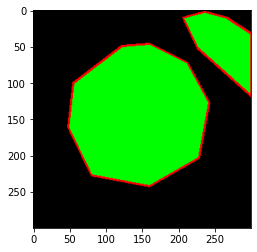

In [53]:
grapeDataset = GrapeDataset("/content/PracData/Images", "/content/PracData/Labels", ["Grape", "Apple"])
grapeDataset[0]